# DATASCI200 Project 2

### Title: EDA Motor Vehicle Incidents in NYC

##### Team: Yanling Liu; Elizabeth (Lily) Maio; Diego Moss
##### Date: April 2024

## Import Data

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.ticker as mtick

# Define a date parser to pass to read_csv
d = lambda x: datetime.strptime(x, '%m/%d/%Y')

# Load the data
data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240320.csv', index_col=False, parse_dates=['CRASH DATE'], date_parser=d)
zip_agi_2013 = pd.read_csv('income_zip.csv')
zip_median_income_2022 = pd.read_csv('zip_median_income.csv')

/tmp/ipykernel_752/358638836.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240320.csv', index_col=False, parse_dates=['CRASH DATE'], date_parser=d)


## Preliminary Data Evaluation/Analysis

##### Data Size, Prelim View

In [2]:
# Evaluate the data size, there are about 2 million records
print('Data shape:', data.shape)

# Review the data
data.head(5)


Data shape: (2073924, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


##### High-level info

In [3]:
#print(data.info())

In [4]:
#data.describe()

## Data Cleaning

##### View Column Headings/Fix Formatting

In [13]:
# View column headings and fix formatting
#print(data.columns)

#vegas.columns = vegas.columns.str.replace('\.*\s+','_').str.lower()
new_col_list = []
for item in data.columns:
    item = item.strip() # strip blank spaces
    item = item.replace('/', '') # replace slashes with nothing
    item = item.replace(' ', '_')
    item = item.replace('#', 'Num')
    item = item.replace('__', '_')
    item = item.capitalize() 
    item = item.lower()
    new_col_list.append(item)

new_col_list 

#replace unformatted column names with formatted column names
data.columns = new_col_list

print(data.columns)

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')


##### Dataset Timeframe/Filter Out Partial Years

In [14]:
# Find the dataset timeframe
data_start = data['crash_date'].min()
data_end = data['crash_date'].max()
print('Dataset begins on:', data_start)
print('Dataset ends on:', data_end)

Dataset begins on: 2012-07-01 00:00:00
Dataset ends on: 2024-03-16 00:00:00


In [15]:
# Filter out partial years (2012, and 2024)
data['year'] = data['crash_date'].dt.year
years = data['year'].unique()
years = list(filter(lambda x: x not in (2012, 2024), years))
sorted_years = sorted(years)
print('Years in dataset:', sorted_years)

data = data[data['year'].isin(sorted_years)]
data.head(3)

Years in dataset: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,year
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022


#####  Filling in Zip Code and Borough missing data
- We have missing data for borough, zipcodes and latitude/longitude
- Without filling in this information, about 30% of the 1.9 Million records (~.6M) is missing
- If we use external data to fill in this missing info we could reduce that to about 10% of missing records (~.2M)
- Below is code to fill in missing location data using New york city zipcodes and google BIG Query data

In [16]:
#install packages if needed
!pip install geopandas
!pip install shapely

#### USING BIG QUERY to fill in zipcodes from latitude and longitude data
- below pulls in data from big query to fill in rows missing ZIP CODES but contain lat/lon data 

In [17]:

# changing names temporarily to get merging to work
data.rename(columns={'zip_code' : 'ZIP CODE',
                    'borough' : 'BOROUGH',
                    'longitude' : 'LONGITUDE',
                    'latitude' : 'LATITUDE'}, inplace=True) 

data.columns

Index(['crash_date', 'crash_time', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'year'],
      dtype='object')

In [18]:
#Load packages

import geopandas as gpd
from shapely.geometry import Point, shape
from shapely.wkt import loads


# Convert the collisions DataFrame to a GeoDataFrame
gdf_collisions = gpd.GeoDataFrame(
    data,
    geometry=[Point(xy) for xy in zip(data.LONGITUDE, data.LATITUDE)],
    crs="EPSG:4326"
)

# Loading the ZIP codes dataset
zipcode_geom_df = pd.read_csv("zipcode_geom_df.csv")
zipcode_geom_df = zipcode_geom_df[zipcode_geom_df['zip_code'].notnull()] #taking out line that didn't load in correctly

#formatting 
zipcode_geom_df['zip_code'] = zipcode_geom_df['zip_code'].astype(str)
zipcode_geom_df['zip_code'] = zipcode_geom_df['zip_code'].apply(lambda x: x[:-2] if x[-2:] == '.0' else x)


# changing to the correct object type for spatial data
gdf_zipcodes = gpd.GeoDataFrame(
    zipcode_geom_df,
    geometry=zipcode_geom_df['zip_code_geom'].apply(loads),
    crs="EPSG:4326"
)


# Perform the spatial join
joined_gdf = gpd.sjoin(gdf_collisions, gdf_zipcodes, how="left", op="within")


# returning to pandas dataframe
data = pd.DataFrame(joined_gdf.drop(columns='geometry'))


# fixing the zipcode to be string and without .0
data['ZIP CODE'] = data['ZIP CODE'].astype(str)
data['ZIP CODE'] = data['ZIP CODE'].apply(lambda x: x[:-2] if x[-2:] == '.0' else x)


# filling in the original zipcode column with the new one
data['ZIP CODE'] = data.apply(lambda row: row['zip_code'] if row['ZIP CODE'] == "nan" else row['ZIP CODE'], axis=1)





/home/thefivemayos/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


##### Zip Code to Borough Mapping
- Filling in missing borough data using zip codes

In [19]:
# now to fill in missing BOROUGH DATA
# loading in the zipcode data


# data for zipcode mapping gathered from: https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php
zipcode_df = pd.read_csv("zipcode borough mapping.csv")


# renaming zipcode data columns for merging
zipcode_df.rename(columns={
    'zipcode': 'zip_code',  # Change 'ZIP CODE' in df_complete to 'zip_code' to match df_missing
    'borough': 'BOROUGH'
}, inplace=True)

# changing type to match data 
zipcode_df['zip_code'] = zipcode_df["zip_code"].astype(str)



# Dropping duplicate rows in zipcode_df that would've inflated our sample in data when merged
zipcode_df = zipcode_df.drop_duplicates(subset=['zip_code'])


# fixing the unique values for borough to match the mapping dataset
data['BOROUGH'] = data['BOROUGH'].replace({'MANHATTAN' : 'Manhattan', 'BROOKLYN' : 'Brooklyn', 'BRONX' : 'Bronx', 'QUEENS' : 'Queens', 'STATEN ISLAND' : 'Staten'})


# merging
data = pd.merge(data, zipcode_df[['zip_code', 'BOROUGH']], on='zip_code', how='left')

# filling in the original BOROUGH column with the new one
data['BOROUGH_x'] = data.apply(lambda row: row['BOROUGH_y'] if row['BOROUGH_x'] == 'nan' else row['BOROUGH_y'], axis=1)


# checking to make sure all the 'nan's were replaced in BOROUGH_x
data['BOROUGH_x'].value_counts()


# renaming and remoing extra column
data.rename(columns= {
    'BOROUGH_x' : 'BOROUGH'
}, inplace = True)


# DROPPING EXTRA COLUMN
data = data.drop(columns=['BOROUGH_y'])


# NULLS LEFT?
data['BOROUGH'].isnull().sum()
#  Should be 227,023 NAs left, about 10% missing data remaining


#putting names back together
data.rename(columns={'zip_code': 'zip_code_mapping'}, inplace = True)


data.rename(columns={'ZIP CODE': 'zip_code',
                    'BOROUGH' : 'borough',
                    'LONGITUDE' : 'longitude',
                    'LATITUDE' : 'latitude'}, inplace=True) 


##### Non-null and Null Analysis

In [12]:
# Non-null Analysis
non_null_counts = data.notnull().sum()
sorted_counts = non_null_counts.sort_values(ascending=False)
sorted_counts


crash_date                       1955282
number_of_pedestrians_injured    1955282
year                             1955282
collision_id                     1955282
crash_time                       1955282
number_of_motorist_injured       1955282
number_of_cyclist_killed         1955282
number_of_cyclist_injured        1955282
number_of_pedestrians_killed     1955282
number_of_motorist_killed        1955282
number_of_persons_injured        1955264
number_of_persons_killed         1955251
contributing_factor_vehicle_1    1948627
vehicle_type_code_1              1941941
zip_code                         1762948
location                         1737914
longitude                        1737914
latitude                         1737914
county                           1715308
city                             1715308
zip_code_mapping                 1715308
index_right                      1715308
zip_code_geom                    1715308
borough                          1699857
contributing_fac

In [13]:
# Null Analysis
null_counts = data.isnull().sum()
null_counts

crash_date                             0
crash_time                             0
borough                           255425
zip_code                          192334
latitude                          217368
longitude                         217368
location                          217368
on_street_name                    420644
cross_street_name                 759922
off_street_name                  1615368
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1       6655
contributing_factor_vehicle_2     306126
contributing_factor_vehicle_3    1815534
contributing_factor_vehicle_4    1923665
contributing_factor_vehicle_5    1946701
collision_id                           0
vehicle_type_cod

In [20]:
# NaN location Data
# There are about 180,000 records missing all location data (zip, borough, lat,long). The only location information is on street and or cross street.
# 180,000/2,000,000 = 9% of the data does not have detailed location information
# Of these 'on street' locations there are 8251 unique location descriptions.
# These are too numberous to realistically fill in. However, a breakdown of the larger categories is shown below.
# Bridge, Tunnel, and major highway accidents account for about 45,000 of these
# Street, road, blouelvard, avenue, etc accidents account for about 100,000 of these
# Null info fills in the remaining records, these records have only 'off_street' location.

location_all_NaN = data[data[['borough', 'zip_code', 'latitude', 'longitude','location']].isna().all(axis=1)]
print('Size of data with all location info blank:', location_all_NaN.shape)

location_all_NaN['on_street_name'].astype(str)
print('Unique locations where crashes occured:', location_all_NaN['on_street_name'].unique().shape)

deaths_location_all_NaN = location_all_NaN['number_of_persons_killed'].sum()
print('Deaths at crashes with no location info: ', deaths_location_all_NaN)

words = r'BRIDGE|EXPRESSWAY|PARKWAY|RAMP|DRIVE|TUNNEL|THRUWAY|thruway|tunnel|drive|bridge|expressway|ramp|expwy|pkwy|expy|pky'
all_NaN_bridge_tunnel_and_highways = location_all_NaN[location_all_NaN['on_street_name'].str.contains(words, case=False, na=False)]
print('Bridge, tunnel and major highway accidents:', all_NaN_bridge_tunnel_and_highways.shape)

words2 = r'STREET|street|ST|st|st.|ROAD|rd|rd.|AVENUE|ave|ave.|BOULEVARD|BLVD|blvd|TURNPIKE|turnpike|tnpk|CIRCLE|circle'
all_NaN_streets_roads = location_all_NaN[location_all_NaN['on_street_name'].str.contains(words2, case=False, na=False)]
print('Street and road accidents:', all_NaN_streets_roads.shape)

print('No on-street info, only off-street:',location_all_NaN['on_street_name'].isnull().sum())


complete_no_location_data = location_all_NaN[location_all_NaN['on_street_name'].isnull()]
deaths_off_street = complete_no_location_data['number_of_persons_killed'].sum()
print('Deaths at off-street crashes with no location info: ', deaths_off_street)

Size of data with all location info blank: (180666, 35)
Unique locations where crashes occured: (8251,)
Deaths at crashes with no location info:  308.0
Bridge, tunnel and major highway accidents: (45870, 35)
Street and road accidents: (95660, 35)
No on-street info, only off-street: 43646
Deaths at off-street crashes with no location info:  57.0


# PLACEHOLDER
- Drop any NaN records that cannot be resolved

##### Clean Zip/Income Datasets and Merge

In [21]:
zip_agi_2013 = zip_agi_2013.reset_index(drop=True)

zip_median_income_2022 = zip_median_income_2022.reset_index(drop=True)


In [22]:
# Fix column names/formatting
#replace unformatted column names with formatted column names

# 2013 IRS AGI Data by Zip -----------------------------------------
new_col_list2 = []
for item in zip_agi_2013.columns:
    item = item.strip() # strip blank spaces
    item = item.replace('/', '') # replace slashes with nothing
    item = item.replace(' ', '_')
    item = item.replace('#', 'Num')
    item = item.replace('__', '_')
    item = item.capitalize() 
    item = item.lower()
    new_col_list2.append(item)

new_col_list2 
zip_agi_2013.columns = new_col_list2


# 2022 Median Income Data by Zip--------------------------------------
new_col_list3 = []
for item in zip_median_income_2022 .columns:
    item = item.strip() # strip blank spaces
    item = item.replace('/', '') # replace slashes with nothing
    item = item.replace(' ', '_')
    item = item.replace('#', 'Num')
    item = item.replace('__', '_')
    item = item.capitalize() 
    item = item.lower()
    new_col_list3.append(item)

new_col_list3 
zip_median_income_2022.columns = new_col_list3



In [23]:
# group by state, create NY subset
zip_agi_2013 = zip_agi_2013[zip_agi_2013['state'] == 'NY']

zip_agi_2013 = zip_agi_2013[['state', 'zip_code', 'avg_agi']]

unique_zips = zip_agi_2013['zip_code'].unique()
print('Unique zip codes in dataset: ', unique_zips.shape) # Approx 1700 for NYS, 1550 represented in dataset


Unique zip codes in dataset:  (1542,)


In [24]:
# Evaluate NY Zip and Adjusted Gross Income (AGI) Data

print('Max agi 2013:', zip_agi_2013['avg_agi'].max())
print('Min agi 2013:', zip_agi_2013['avg_agi'].min())
filtered_maxagi = zip_agi_2013[(zip_agi_2013['avg_agi'] == 944.1335689)]  # This is in financial district NYC
print(filtered_maxagi)
filtered_minagi = zip_agi_2013[(zip_agi_2013['avg_agi'] == 20.33464286)] # Schenectady, NY
print(filtered_minagi)


Max agi 2013: 944.1335689
Min agi 2013: 20.33464286
      state  zip_code     avg_agi
15978    NY     10005  944.133569
      state  zip_code    avg_agi
16567    NY     12307  20.334643


In [25]:
# Merging crash records data and socioeconomic data

# Merge data from IRS NYC Adjusted Gross Income (AGI) 2013
zip_agi_2013['zip_code'] = zip_agi_2013['zip_code'].astype(str)
merged_data_agi = pd.merge(left=data, right=zip_agi_2013, on='zip_code', how='left')
merged_data_agi[['crash_date', 'borough', 'zip_code','avg_agi']].head(15)

# Merge data NYC median income from 2022
#https://simplemaps.com/city/new-york/zips/income-household-median
zip_median_income_2022['zip_code'] = zip_median_income_2022['zip_code'].astype(str)
merged_data_agi_medianincome = pd.merge(left=merged_data_agi, right=zip_median_income_2022, on='zip_code', how='left')
merged_data_agi_medianincome[['crash_date', 'borough', 'zip_code','avg_agi','median_income']].head(15)


,crash_date,borough,zip_code,avg_agi,median_income
0,2021-09-11,NaN,NaN,NaN,NaN
1,2022-03-26,NaN,NaN,NaN,NaN
2,2022-06-29,NaN,NaN,NaN,NaN
3,2021-09-11,Brooklyn,11208,28.177855,49679.0
4,2021-12-14,Brooklyn,11233,34.312610,52380.0
5,2021-04-14,NaN,NaN,NaN,NaN
6,2021-12-14,Brooklyn,11211,58.708847,89091.0
7,2021-12-14,Bronx,10475,44.786648,56327.0
8,2021-12-14,Brooklyn,11207,29.292280,45616.0
9,2021-12-14,Manhattan,10017,343.702022,136112.0


In [20]:
merged_null_counts = merged_data_agi_medianincome.isnull().sum()
merged_null_counts

crash_date                             0
crash_time                             0
borough                           255425
zip_code                          192334
latitude                          217368
longitude                         217368
location                          217368
on_street_name                    420644
cross_street_name                 759922
off_street_name                  1615368
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1       6655
contributing_factor_vehicle_2     306126
contributing_factor_vehicle_3    1815534
contributing_factor_vehicle_4    1923665
contributing_factor_vehicle_5    1946701
collision_id                           0
vehicle_type_cod

###### TBD - Any Nulls/Columns to remove from consideration?

## Preliminary Data Visulization and Fact Checking

In [26]:
# TOTAL NUMBER OF DEATHS
# The data set indicates a total of 3,099 deaths from 2012 through 2024.
# Checking online, on average there are around 200-300 deaths each year due to motor vehicle related accidents. 
# This lines up with about 3,000 deaths ina 12-year period.

total_deaths = data['number_of_persons_killed'].sum()
print('Total number of deaths from 2013 - 2023:',total_deaths)

# DEATHS BY YEAR
deaths_by_year = data.groupby('year')['number_of_persons_killed'].sum().reset_index()
print(deaths_by_year)


Total number of deaths from 2013 - 2023: 2906.0
    year  number_of_persons_killed
0   2013                     297.0
1   2014                     262.0
2   2015                     243.0
3   2016                     246.0
4   2017                     256.0
5   2018                     231.0
6   2019                     244.0
7   2020                     269.0
8   2021                     296.0
9   2022                     289.0
10  2023                     273.0


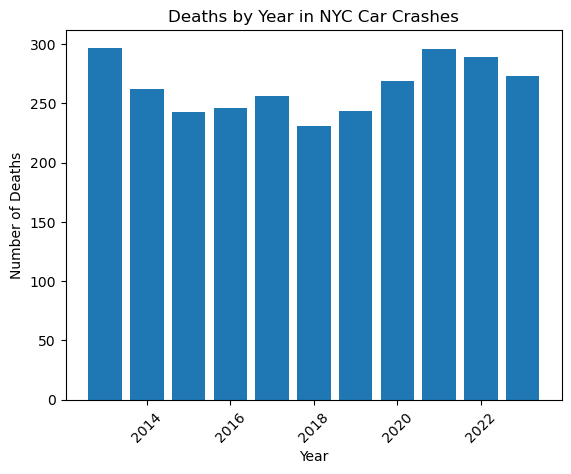

In [27]:
# DEATHS BY YEAR HISTOGRAM
# To evaluate if deaths per year are stable or trending up or down
plt.bar(deaths_by_year['year'], deaths_by_year['number_of_persons_killed'])
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Deaths by Year in NYC Car Crashes')
plt.xticks(rotation=45) 
plt.show()

   

/tmp/ipykernel_752/3873170301.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_year = data.groupby('year').sum().reset_index()


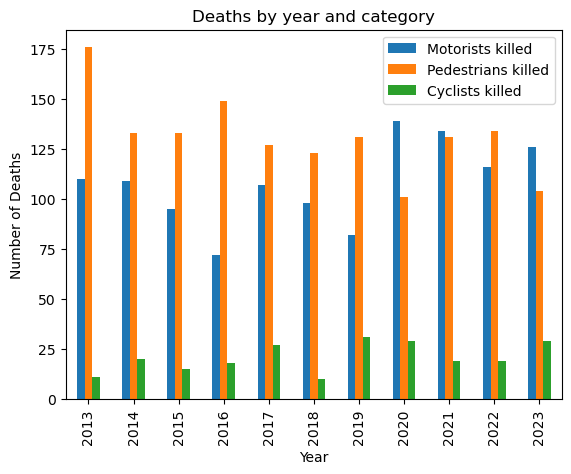

In [28]:
# Evaluate deaths and death type (pedestrian, cyclist, motorist, etc) by year
group_year = data.groupby('year').sum().reset_index()
group_year.set_index('year', inplace=True) # setting year as index
group_year[['number_of_motorist_killed','number_of_pedestrians_killed',
       'number_of_cyclist_killed',
       ]].plot(kind='bar', stacked=False)
plt.title('Deaths by year and category')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
#plt.xticks(rotation=45)
plt.legend(['Motorists killed', 'Pedestrians killed', 'Cyclists killed'])

In [30]:
# Evaluating deadliness for motorists, pedestrians, cyclists
# Assumption, when calculating incidents, only counting those where there is a recorded injury or death
tot_ped_accidents = data[data['number_of_pedestrians_killed']>0]['number_of_pedestrians_killed'].count() + data[data['number_of_pedestrians_injured']>0]['number_of_pedestrians_injured'].count()
deadly_ped_accidents = data[data['number_of_pedestrians_killed']>0]['number_of_pedestrians_killed'].count()
print('Incidents Involving Pedestrian(s): ',  tot_ped_accidents )
print('Deadly Incidents Involving Pedestrian(s): ', deadly_ped_accidents)
print('Pedestrian Death Rate: ', (deadly_ped_accidents/tot_ped_accidents)*100)

tot_cyc_accidents = data[data['number_of_cyclist_killed']>0]['number_of_cyclist_killed'].count() + data[data['number_of_cyclist_injured']>0]['number_of_cyclist_injured'].count()
deadly_cyc_accidents = data[data['number_of_cyclist_killed']>0]['number_of_cyclist_killed'].count()
print('Incidents Involving Cyclist(s): ', tot_cyc_accidents )
print('Deadly Incidents Involving Cyclist(s): ', deadly_cyc_accidents)
print('Cyclist Death Rate: ', (deadly_cyc_accidents/tot_cyc_accidents)*100)

tot_motor_accidents = data[data['number_of_motorist_killed']>0]['number_of_motorist_killed'].count() + data[data['number_of_motorist_injured']>0]['number_of_motorist_injured'].count()
deadly_motor_accidents = data[data['number_of_motorist_killed']>0]['number_of_motorist_killed'].count()
print('Incidents Involving Motorist(s): ', tot_motor_accidents )
print('Deadly Incidents Involving Motorist(s): ', deadly_motor_accidents)
print('Motorist Death Rate: ', (deadly_motor_accidents/tot_motor_accidents)*100)


Incidents Involving Pedestrian(s):  106156
Deadly Incidents Involving Pedestrian(s):  1425
Pedestrian Death Rate:  1.3423640679754325
Incidents Involving Cyclist(s):  52266
Deadly Incidents Involving Cyclist(s):  227
Cyclist Death Rate:  0.4343167642444419
Incidents Involving Motorist(s):  286257
Deadly Incidents Involving Motorist(s):  1103
Motorist Death Rate:  0.38531808829129066


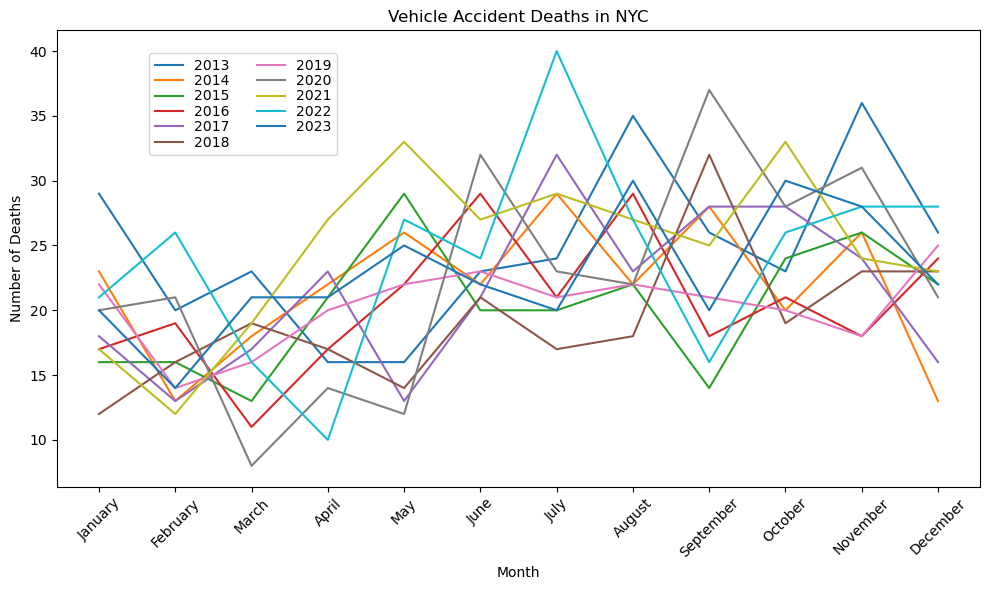

In [31]:
# DEATHS BY MONTH FOR EACH YEAR LINE PLOT
# To evaluate any seasonl impact, deaths were plotted by month from each year
#data['year'] = data['CRASH DATE'].dt.year
data['month'] = data['crash_date'].dt.month
deaths_by_year_month = data.groupby(['year', 'month'])['number_of_persons_killed'].sum().reset_index()

plt.figure(figsize=(10, 6))
years = deaths_by_year_month['year'].unique()
for year in years:
    data_for_year = deaths_by_year_month[deaths_by_year_month['year'] == year]
    #print(data_for_year)
    plt.plot(data_for_year['month'], data_for_year['number_of_persons_killed'], label = str(year))

plt.legend(ncol = 2, labelspacing = .1, borderaxespad = 0, bbox_to_anchor = (0.1,.95), loc = 'upper left')
plt.title('Vehicle Accident Deaths in NYC')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(np.arange(1,13), labels = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# 2022 has an unusual trend upward in deaths in the first quarter of the year. This is seen in the data (line chart above)
# and captured in the following news article:
# https://transalt.org/press-releases/new-data-shows-44-percent-increase-in-traffic-fatalities-during-first-three-months-of-2022-deadliest-start-to-any-year-since-vision-zero-began-in-2014

## Proposal Questions

######
1. Which borough has the highest occurrences of injuries and death from vehicle collisions? (including pedestrian, cyclist, persons overall)

2. What vehicle type and contribution factor is more common to cause deaths in a collision? What about collisions?

3. What’s the correlation between characteristics analyzed in Question 1 & 2 (i.e. borough, vehicle type, contribution factor to collision) in the data and likelihood of death in a collision? What traits contribute to deaths in a collision if any?

4. Is there any correlation between median income of a zip code and number of deaths from collisions?

#### Question 1
#### Which borough has the highest occurrences of injuries and death from vehicle collisions?


The boroughs of New York City are typically believed to represent differences in socioeconomic class. If socioeconomic structures do have a relationship with traffic collisions and deaths, we would expect to see differences at the borough level. And so it is expected that we would see the lowest rates of injury and death from traffic collisions to be in Manahttan and the highest to be in the Bronx. However, descriptive statistics do not result in this pattern exactly.

Below is a table and bar plots representing the injury and death rate per 100,000 people for each burough of New York. The rate represents how many individuals, when controlling for borough population, have been involved over the span of the ten years of analysis. As a note, this is not the yearly rate, but the rate over the span of 10 years.

After aggregating and analyzing the data, the table shows mixed support for the idea that the poorer boroughs and richer boroughs experience differences in collision or death rates from traffic accidents. While Manhatten has substantially lower rates of total persons and motorists being injured or killed, it has about average rates (compared to the other boroughs) of injury and death for cyclists and pedestrians. This could be due to the frequency of pedestrians and cyclists in this borough compared to others, but that data was not gathered for this project.

If there was a stronger association between socioeconomic class and rates of injury/death at the borough level, we would see rates increase in this order: Manhatten, Brooklyn, Queens, Staten Island, and Bronx. However, this is not a clear distinction in the data. Either this phenomena can only be seen when comparing Manhattan to the other boroughs, or the effect of class on likelihood of traffic collisions may not aggregate to the borough level, but may depend on a smaller level, such as at the street or zipcode unit of analysis.

In [27]:
# Get total deaths and collisions for each borough, then get rates per 100,000 people in each borough

# grouped by borough and whether it is death or collision. columns will be persons, pedestrian, cyclist and motorist 

data_long = pd.melt(data, id_vars=['collision_id', 'borough'], value_vars=['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured', 'number_of_motorist_killed'])


# Split the 'variable' column into 'category' and 'type' columns
data_long['category'] = data_long['variable'].apply(lambda x: '_'.join(x.split('_')[:-1]))
data_long['type'] = data_long['variable'].apply(lambda x: x.split('_')[-1])

data_long.drop('variable', axis=1, inplace=True)

# Pivot the DataFrame to get 'category' objects as columns and 'type' as elongated
data_long = data_long.pivot_table(index=['collision_id', 'borough', 'type'], columns='category', values='value').reset_index()

# not necessary anymore
data_long.drop('collision_id', axis=1, inplace=True)



# aggregatting totals for each borough and injury/killed counts
data_long = data_long.groupby(['borough', 'type']).sum()



# Calculate rates per 100,000 people

# creating a mapping dictionary so we can get rates of injury/death per 100,000 people in each borough
# Population numbers gathered from the 2020 census
mapping_dict = {
    'Queens': 2.4e6,
    'Brooklyn': 2.7e6,
    'Staten': 0.5e6,
    'Manhattan': 1.7e6,
    'Bronx': 1.5e6
}


for column in data_long.columns:
    if column.startswith('number'):
        data_long[column] = data_long.apply(lambda row: round((row[column] / mapping_dict[row.name[0]]) * 100000, 2), axis=1)




# Changing column names to make table cleaner
data_long.rename(columns={'number_of_cyclist' : 'Cyclists',
                    'number_of_motorist' : 'Motorists',
                    'number_of_pedestrians' : 'Pedestrians',
                    'number_of_persons' : 'Persons'}, inplace=True) 



# printing data frame
data_long


# For a ten-year period, the rate of injury and death per 100,000 in each borough is presented below

category           Cyclists  Motorists  Pedestrians  Persons
borough   type                                              
Bronx     injured    335.07    4413.40      1113.13  5934.13
          killed       1.87      13.00        12.87    28.40
Brooklyn  injured    708.67    4594.67      1271.04  6678.93
          killed       2.89       9.56        14.67    27.74
Manhattan injured    815.53    2497.76      1285.59  4662.76
          killed       2.53       5.88        14.18    23.06
Queens    injured    383.75    4994.54       993.21  6443.38
          killed       1.62      15.04        14.96    32.00
Staten    injured    136.20    4132.40       681.00  4969.00
          killed       1.20      15.60        10.60    27.80

Text(0.5, 1.0, '10 Year Traffic Injury Rate per 100,000 people by NY Borough')

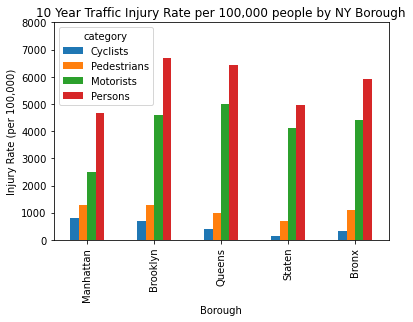

In [28]:
# visualizing rates of injury by borough

borough_injury_plot = data_long.drop('killed', level = 'type').reset_index().drop('type', axis = 1).set_index('borough')
borough_injury_plot = borough_injury_plot[["Cyclists", 'Pedestrians', 'Motorists', "Persons"]]
borough_injury_plot = borough_injury_plot.reindex(["Manhattan", 'Brooklyn', 'Queens', 'Staten', 'Bronx'])


ax = borough_injury_plot.plot(kind = 'bar')
ax.set_ylabel('Injury Rate (per 100,000)')
ax.set_ylim(0,8000)
ax.set_xlabel('Borough')
ax.set_title('10 Year Traffic Injury Rate per 100,000 people by NY Borough')

Text(0.5, 1.0, '10 Year Traffic Death Rate per 100,000 people by NY Borough')

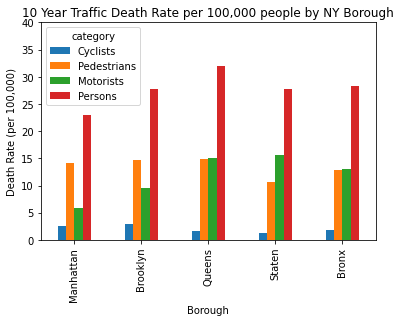

In [29]:
# visualizing rates of death by borough

borough_injury_plot = data_long.drop('injured', level = 'type').reset_index().drop('type', axis = 1).set_index('borough')
borough_injury_plot = borough_injury_plot[["Cyclists", 'Pedestrians', 'Motorists', "Persons"]]
borough_injury_plot = borough_injury_plot.reindex(["Manhattan", 'Brooklyn', 'Queens', 'Staten', 'Bronx'])


ax = borough_injury_plot.plot(kind = 'bar')
ax.set_ylabel('Death Rate (per 100,000)')
ax.set_ylim(0, 40)
ax.set_xlabel('Borough')
ax.set_title('10 Year Traffic Death Rate per 100,000 people by NY Borough')

#### Question 2
What vehicle type and contribution factor is more common to cause deaths in a collision? What about collisions?

#### Vehicle_type_code_1 & Accidents
- Notice that naming in the vehicle_type_code_1 column is not consistent. The same type may appear multiple times in different formats such as upper case, lower case, different ordering of words, etc.

In [30]:
# what are values in vehicle_type_code_1
data['vehicle_type_code_1_cleaned'] = data['vehicle_type_code_1'].apply(lambda x:str(x).lower())
data['vehicle_type_code_1_cleaned'].value_counts().head(10)

sedan                                  567629
station wagon/sport utility vehicle    446627
passenger vehicle                      358399
sport utility / station wagon          159576
taxi                                    78855
pick-up truck                           44209
4 dr sedan                              40169
bus                                     33461
van                                     31283
box truck                               24053
Name: vehicle_type_code_1_cleaned, dtype: int64

In [31]:
# clean up values in vehicle_type_code_1
vehicle_type_names = {"sedan":"sedan", "station wagon":"station_wagon_or_suv", "sport utility":"station_wagon_or_suv", "suv":"station_wagon_or_suv", "truck":"truck", "van":"van", "motorcycle":"motorcycle", "motorbike":"motorcycle", "bike":"bicycle", "bicycle":"bicycle"}
for i in vehicle_type_names.keys():
    data.loc[data['vehicle_type_code_1_cleaned'].str.contains(i), 'vehicle_type_code_1_cleaned'] = vehicle_type_names[i]

/var/folders/78/4_cfdlhs50940f62pnrx1t5m0000gn/T/ipykernel_17905/1350699458.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vehicle_type_code_1_cleaned_values['vehicle_type_code_1'], rotation=45)


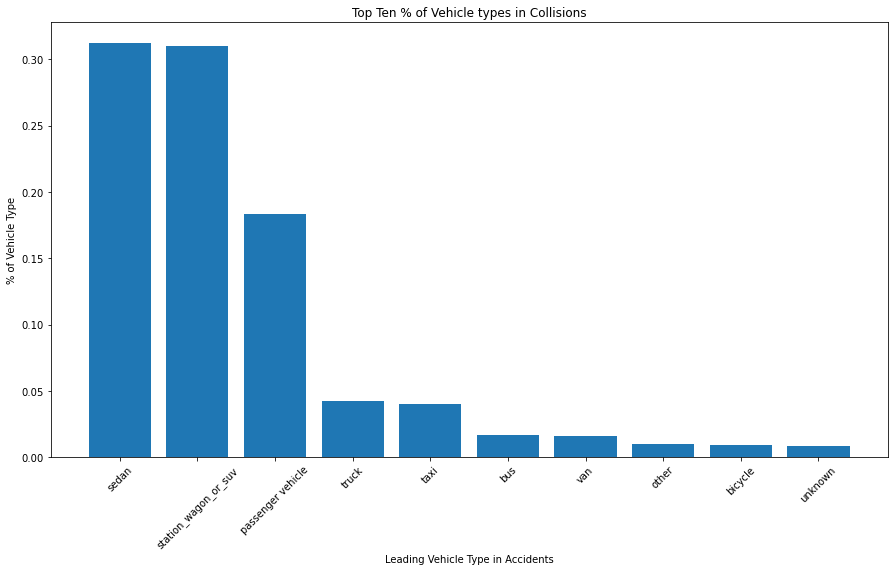

In [32]:
# obtain count of vehicle types and make it into a dataframe
vehicle_type_code_1_cleaned_values = pd.DataFrame(data['vehicle_type_code_1_cleaned'].value_counts()).head(10).reset_index()

# rename columns
vehicle_type_code_1_cleaned_values.columns = ['vehicle_type_code_1', 'count']

# Visualization for Top Ten Percentage of Vehicle types in Collisions
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.bar(vehicle_type_code_1_cleaned_values['vehicle_type_code_1'], vehicle_type_code_1_cleaned_values['count']/len(data['vehicle_type_code_1_cleaned']))
ax.set_title("Top Ten % of Vehicle types in Collisions")
ax.set(xlabel = 'Leading Vehicle Type in Accidents')
ax.set(ylabel = '% of Vehicle Type')
ax.set_xticklabels(vehicle_type_code_1_cleaned_values['vehicle_type_code_1'], rotation=45)
pass

#### Contributing_factor_vehicle_1 & Accidents
Noticed the following points about contributing_factor_vehicle_1:
- Some values are the same, just differ in lower and upper case
- There are nan values, which we will rename it to be "unspecified"
- There are two numerical values, 80 & 1. Since there are no documentation about what they are, we will rename them to be "unspecified"

In [33]:
# clean values in contributing_factor_vehicle_1
data['contributing_factor_vehicle_1_cleaned'] = data['contributing_factor_vehicle_1'].apply(lambda x:str(x).lower())
data['contributing_factor_vehicle_1_cleaned'] = data['contributing_factor_vehicle_1_cleaned'].replace({'nan', '80', '1'}, 'unspecified').replace('illnes', 'illness')

In [34]:
# setting to display all rows
pd.set_option('display.max_rows', None)
# obtain count of contributing factors and make it into a dataframe
contributing_factor_vehicle_1_cleaned_values = pd.DataFrame(data['contributing_factor_vehicle_1_cleaned'].value_counts()).reset_index()

In [35]:
# After cleaning, values of contributing factor changed from 61 to 56
contributing_factor_vehicle_1_cleaned_values.shape

(56, 2)

In [36]:
# rename columns
contributing_factor_vehicle_1_cleaned_values.columns = ['contribution_factor_vehicle_1', 'count']
# remove unspecified values & how many values do we have for further analysis after removing unspecified values
contrib_factor_total_count = contributing_factor_vehicle_1_cleaned_values['count'].sum() 
contrib_factor_unspecified_count = contributing_factor_vehicle_1_cleaned_values['count'][contributing_factor_vehicle_1_cleaned_values['contribution_factor_vehicle_1']=='unspecified'][0]
# - contributing_factor_vehicle_1_cleaned_values['count'][contributing_factor_vehicle_1_cleaned_values['contribution_factor_vehicle_1']=='unspeficied']
print(f"In contribution_factor_vehicle_1, there are {contrib_factor_total_count} values. Among them, there are {contrib_factor_unspecified_count} unspecified values.\nWe will remove unspecified values from further analysis, because we cannot name a random reason without knowing the what actually happened in the accident, otherwise it would introduce bias to our analysis.\nAfter removing unspecified values, we are left with {contrib_factor_total_count-contrib_factor_unspecified_count} values.")
contributing_factor_vehicle_1_cleaned_values = contributing_factor_vehicle_1_cleaned_values[contributing_factor_vehicle_1_cleaned_values['contribution_factor_vehicle_1']!='unspecified']

In contribution_factor_vehicle_1, there are 1955282 values. Among them, there are 649153 unspecified values.
We will remove unspecified values from further analysis, because we cannot name a random reason without knowing the what actually happened in the accident, otherwise it would introduce bias to our analysis.
After removing unspecified values, we are left with 1306129 values.


/var/folders/78/4_cfdlhs50940f62pnrx1t5m0000gn/T/ipykernel_17905/1827110700.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(contributing_factor_vehicle_1_cleaned_values['contribution_factor_vehicle_1'], rotation=90)


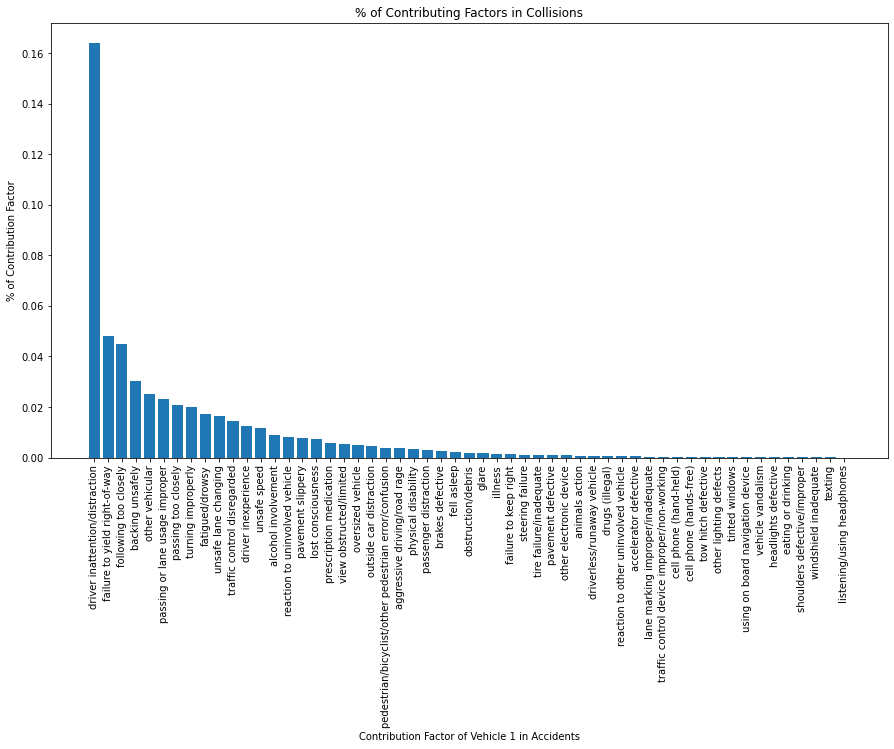

In [37]:
# Visualization for Percentage of Contributing Factors in Collisions
import matplotlib.ticker as mtick
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.bar(contributing_factor_vehicle_1_cleaned_values['contribution_factor_vehicle_1'], contributing_factor_vehicle_1_cleaned_values['count']/2441349)
ax.set_title("% of Contributing Factors in Collisions")
ax.set(xlabel = 'Contribution Factor of Vehicle 1 in Accidents')
ax.set(ylabel = '% of Contribution Factor')
ax.set_xticklabels(contributing_factor_vehicle_1_cleaned_values['contribution_factor_vehicle_1'], rotation=90)
pass

##### Observations
- More than 30% of known contribution factors of vehicle 1 is driver inattention or distraction
- The second most common contribution factor is less than 10% of all values, which is failure to yield right-of-way
- The top 5 most common contribution factors are: driver inattention or distraction, failure to yield right-of-way, following too closely, backing unsafely, other vehicular

##### Visualization for Contribution Factor Composition per Vehicle Type

In [38]:
# obtain count of vehicle types and contribution factor, and make it into a dataframe
data_top_vehicle = data[data['vehicle_type_code_1_cleaned'].isin(vehicle_type_code_1_cleaned_values['vehicle_type_code_1'])]
# create joint table
data_top_vehicle_factors = data_top_vehicle[['vehicle_type_code_1_cleaned', 'contributing_factor_vehicle_1_cleaned']].set_index('contributing_factor_vehicle_1_cleaned')
data_top_vehicle_factors = pd.DataFrame(data_top_vehicle[['vehicle_type_code_1_cleaned', 'contributing_factor_vehicle_1_cleaned']].value_counts()).reset_index()
data_top_vehicle_factors.columns = ('Vehicle Type', 'Contribution Factor', 'Count')
Vehicle_Type_Count = pd.DataFrame(data_top_vehicle_factors.groupby('Vehicle Type').sum().Count).reset_index()
data_top_vehicle_factors = data_top_vehicle_factors.merge(Vehicle_Type_Count, on='Vehicle Type', how='left', suffixes=('_contrib', '_vehicle'))
data_top_vehicle_factors['% Contribution Factor per Vehicle Type'] = data_top_vehicle_factors['Count_contrib']/data_top_vehicle_factors['Count_vehicle']*100
data_top_vehicle_factors.loc[-data_top_vehicle_factors['Contribution Factor'].isin(contributing_factor_vehicle_1_cleaned_values.head(5)['contribution_factor_vehicle_1']),'Contribution Factor']='others'
# create pivot table for plotting
data_top_vehicle_factors_pivot = pd.pivot_table(data_top_vehicle_factors.sort_values('Count_vehicle'), values='% Contribution Factor per Vehicle Type', index=['Vehicle Type'], columns = ['Contribution Factor'], aggfunc="sum").fillna(0)
data_top_vehicle_factors_pivot = data_top_vehicle_factors_pivot.sort_values('others').T.sort_values('sedan', ascending=False).T

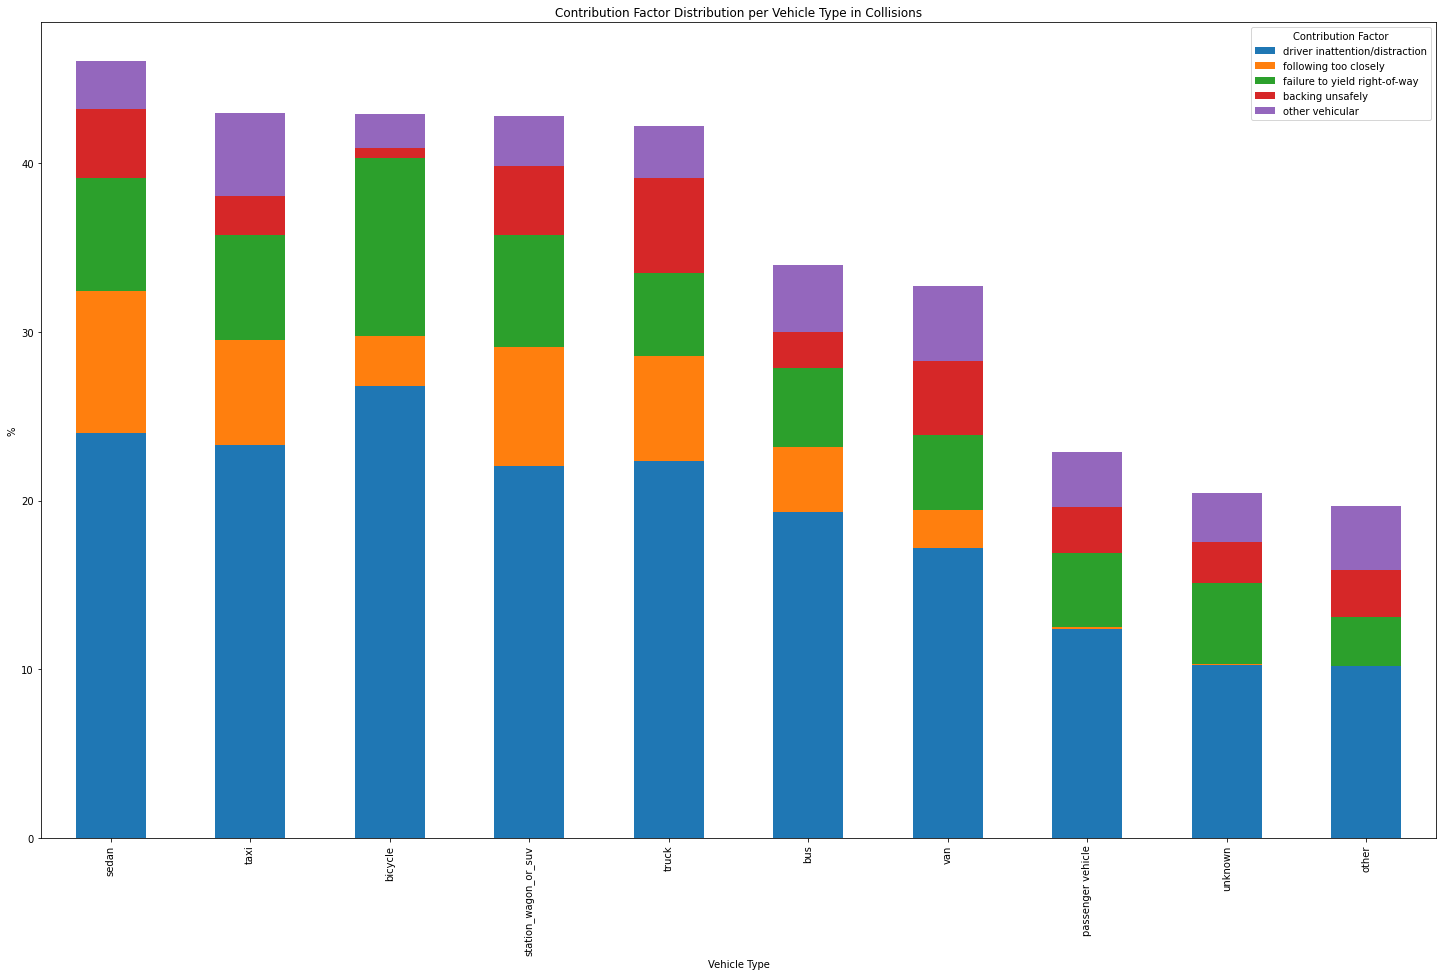

In [39]:
# create bar graph for contribution factor distribution per vehicle type
data_top_vehicle_factors_pivot.drop('others', axis=1).plot(kind = 'bar', stacked=True, figsize = (25,15), title = "Contribution Factor Distribution per Vehicle Type in Collisions", ylabel="%")
pass

#### Vehicle_type_code_1 & Deaths

In [40]:
vehicle_type_deaths = data[data['number_of_persons_killed']!=0][['vehicle_type_code_1_cleaned', 'number_of_persons_killed']]
# obtain count of vehicle types and make it into a dataframe
deaths_by_vehicle_type = vehicle_type_deaths.groupby('vehicle_type_code_1_cleaned').sum().reset_index()
deaths_by_vehicle_type['%deaths'] = deaths_by_vehicle_type['number_of_persons_killed']/sum(deaths_by_vehicle_type['number_of_persons_killed'])*100
# obtain top 10 vehicles that have the most deaths
top_10_deaths_vehicles = deaths_by_vehicle_type.sort_values('%deaths', ascending=False).head(10)

/var/folders/78/4_cfdlhs50940f62pnrx1t5m0000gn/T/ipykernel_17905/2382494362.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_deaths_vehicles['vehicle_type_code_1_cleaned'], rotation=45)


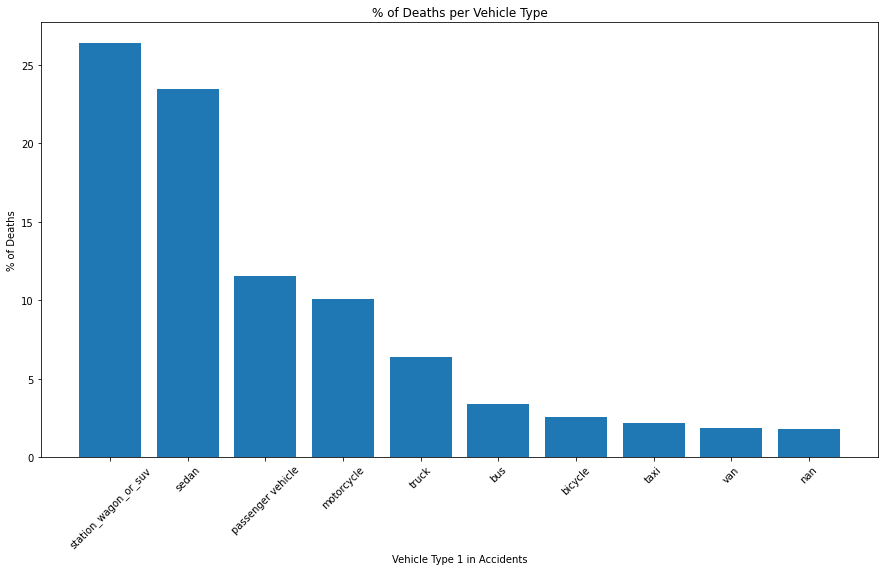

In [41]:
# Visualization for Percentage of Contributing Factors in Collisions
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.bar(top_10_deaths_vehicles['vehicle_type_code_1_cleaned'], top_10_deaths_vehicles['%deaths'])
ax.set_title("% of Deaths per Vehicle Type")
ax.set(xlabel = 'Vehicle Type 1 in Accidents')
ax.set(ylabel = '% of Deaths')
ax.set_xticklabels(top_10_deaths_vehicles['vehicle_type_code_1_cleaned'], rotation=45)
pass

#### Contributing_factor_vehicle_1 & Deaths

In [42]:
contrib_factor_deaths = data[data['number_of_persons_killed']!=0][['contributing_factor_vehicle_1_cleaned', 'number_of_persons_killed']]
# obtain count of contributing factors and make it into a dataframe
deaths_by_contrib_factor = contrib_factor_deaths.groupby('contributing_factor_vehicle_1_cleaned').sum().reset_index()
deaths_by_contrib_factor['%deaths'] = deaths_by_contrib_factor['number_of_persons_killed']/sum(deaths_by_contrib_factor['number_of_persons_killed'])*100
# obatin top 10 contributing factor to deaths
top_10_contributing_factor_to_deaths = deaths_by_contrib_factor.sort_values('%deaths', ascending=False).head(10)

/var/folders/78/4_cfdlhs50940f62pnrx1t5m0000gn/T/ipykernel_17905/527898257.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_contributing_factor_to_deaths['contributing_factor_vehicle_1_cleaned'], rotation=45)


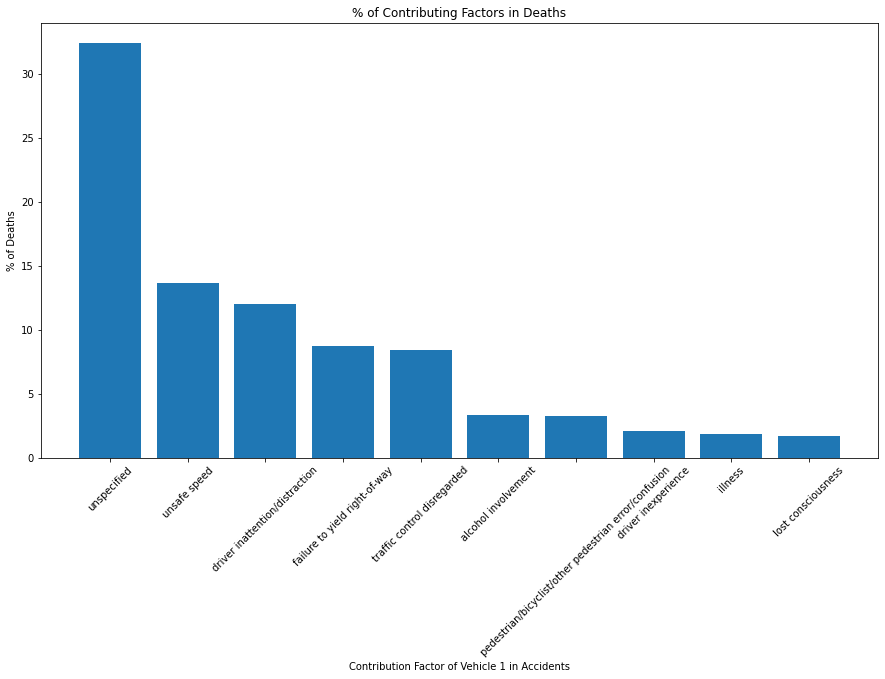

In [43]:
# Visualization for Percentage of Contributing Factors in Collisions
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.bar(top_10_contributing_factor_to_deaths['contributing_factor_vehicle_1_cleaned'], top_10_contributing_factor_to_deaths['%deaths'])
ax.set_title("% of Contributing Factors in Deaths")
ax.set(xlabel = 'Contribution Factor of Vehicle 1 in Accidents')
ax.set(ylabel = '% of Deaths')
ax.set_xticklabels(top_10_contributing_factor_to_deaths['contributing_factor_vehicle_1_cleaned'], rotation=45)
pass

#### Question 3
What’s the correlation between characteristics analyzed in Question 1 & 2 (i.e. borough, vehicle type, contribution factor to collision) in the data and likelihood of death in a collision? What traits contribute to deaths in a collision if any?

In [44]:
# contributing_factor
heatmap_data_contributing_factor = data[(data['contributing_factor_vehicle_1_cleaned'].isin(contributing_factor_vehicle_1_cleaned_values.head(10)['contribution_factor_vehicle_1']))|(data['contributing_factor_vehicle_1_cleaned'].isin(top_10_contributing_factor_to_deaths['contributing_factor_vehicle_1_cleaned']))][['contributing_factor_vehicle_1_cleaned', 'number_of_persons_injured', 'number_of_persons_killed']]
# use one-hot-encoding to transform contributing factbs into boolean columns
heatmap_data_contributing_factor_one_hot_encoded = pd.get_dummies(heatmap_data_contributing_factor, columns=['contributing_factor_vehicle_1_cleaned'])
heatmap_data_contributing_factor_one_hot_encoded.head()

,number_of_persons_injured,number_of_persons_killed,contributing_factor_vehicle_1_cleaned_alcohol involvement,contributing_factor_vehicle_1_cleaned_backing unsafely,contributing_factor_vehicle_1_cleaned_driver inattention/distraction,contributing_factor_vehicle_1_cleaned_driver inexperience,contributing_factor_vehicle_1_cleaned_failure to yield right-of-way,contributing_factor_vehicle_1_cleaned_fatigued/drowsy,contributing_factor_vehicle_1_cleaned_following too closely,contributing_factor_vehicle_1_cleaned_illness,contributing_factor_vehicle_1_cleaned_lost consciousness,contributing_factor_vehicle_1_cleaned_other vehicular,contributing_factor_vehicle_1_cleaned_passing or lane usage improper,contributing_factor_vehicle_1_cleaned_passing too closely,contributing_factor_vehicle_1_cleaned_pedestrian/bicyclist/other pedestrian error/confusion,contributing_factor_vehicle_1_cleaned_traffic control disregarded,contributing_factor_vehicle_1_cleaned_turning improperly,contributing_factor_vehicle_1_cleaned_unsafe lane changing,contributing_factor_vehicle_1_cleaned_unsafe speed,contributing_factor_vehicle_1_cleaned_unspecified
2,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'number_of_persons_killed'),
  Text(1.5, 0, 'contributing_factor_vehicle_1_cleaned_unsafe speed'),
  Text(2.5, 0, 'contributing_factor_vehicle_1_cleaned_traffic control disregarded'),
  Text(3.5, 0, 'contributing_factor_vehicle_1_cleaned_pedestrian/bicyclist/other pedestrian error/confusion'),
  Text(4.5, 0, 'contributing_factor_vehicle_1_cleaned_illness'),
  Text(5.5, 0, 'contributing_factor_vehicle_1_cleaned_alcohol involvement'),
  Text(6.5, 0, 'contributing_factor_vehicle_1_cleaned_failure to yield right-of-way'),
  Text(7.5, 0, 'contributing_factor_vehicle_1_cleaned_lost consciousness'),
  Text(8.5, 0, 'contributing_factor_vehicle_1_cleaned_driver inexperience'),
  Text(9.5, 0, 'contributing_factor_vehicle_1_cleaned_unspecified')])

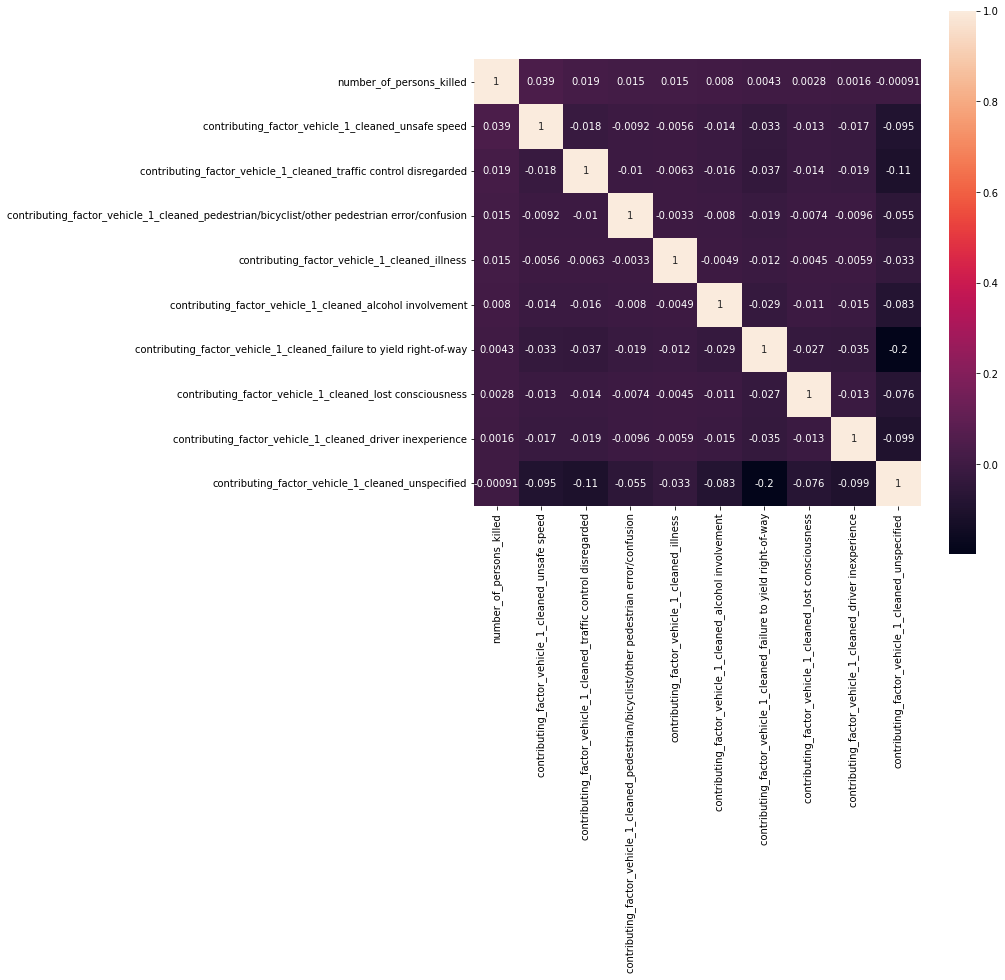

In [45]:
#Zoomed Heatmap Top 10
corr = heatmap_data_contributing_factor_one_hot_encoded.drop('number_of_persons_injured',axis=1).corr(method='pearson')
large_idx = corr.nlargest(10, 'number_of_persons_killed').index 
top_rows = corr.loc[large_idx, large_idx]
plt.figure(figsize=(10, 10))
ax = sns.heatmap(top_rows, annot=True, square=True)
plt.xticks(rotation = 90)

In [46]:
# vehicle_type
heatmap_data_vehicle_type = data[(data['vehicle_type_code_1_cleaned'].isin(top_10_deaths_vehicles['vehicle_type_code_1_cleaned']))][['vehicle_type_code_1_cleaned', 'number_of_persons_injured', 'number_of_persons_killed']]
# use one-hot-encoding to transform vehicle types into boolean columns
heatmap_data_vehicle_type_one_hot_encoded = pd.get_dummies(heatmap_data_vehicle_type, columns=['vehicle_type_code_1_cleaned'])
heatmap_data_vehicle_type_one_hot_encoded.head()

,number_of_persons_injured,number_of_persons_killed,vehicle_type_code_1_cleaned_bicycle,vehicle_type_code_1_cleaned_bus,vehicle_type_code_1_cleaned_motorcycle,vehicle_type_code_1_cleaned_nan,vehicle_type_code_1_cleaned_passenger vehicle,vehicle_type_code_1_cleaned_sedan,vehicle_type_code_1_cleaned_station_wagon_or_suv,vehicle_type_code_1_cleaned_taxi,vehicle_type_code_1_cleaned_truck,vehicle_type_code_1_cleaned_van
0,2.0,0.0,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0,0,0,1,0,0,0,0,0,0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'number_of_persons_killed'),
  Text(1.5, 0, 'vehicle_type_code_1_cleaned_motorcycle'),
  Text(2.5, 0, 'vehicle_type_code_1_cleaned_bicycle'),
  Text(3.5, 0, 'vehicle_type_code_1_cleaned_nan'),
  Text(4.5, 0, 'vehicle_type_code_1_cleaned_bus'),
  Text(5.5, 0, 'vehicle_type_code_1_cleaned_truck'),
  Text(6.5, 0, 'vehicle_type_code_1_cleaned_van'),
  Text(7.5, 0, 'vehicle_type_code_1_cleaned_station_wagon_or_suv'),
  Text(8.5, 0, 'vehicle_type_code_1_cleaned_taxi'),
  Text(9.5, 0, 'vehicle_type_code_1_cleaned_sedan')])

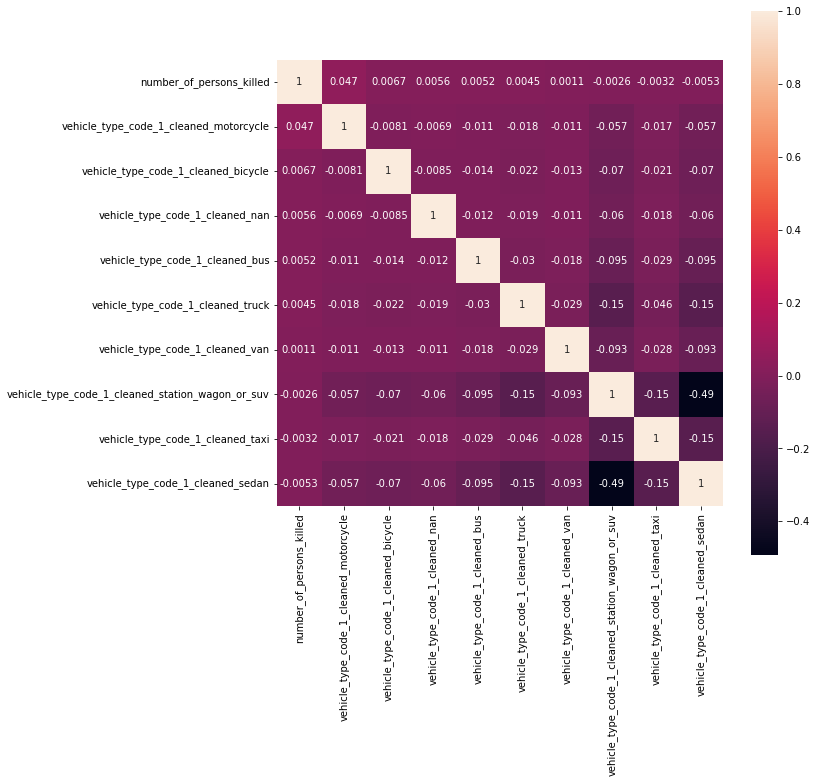

In [47]:
#Zoomed Heatmap Top 10
corr = heatmap_data_vehicle_type_one_hot_encoded.drop('number_of_persons_injured',axis=1).corr(method='pearson')
large_idx = corr.nlargest(10, 'number_of_persons_killed').index 
top_rows = corr.loc[large_idx, large_idx]
plt.figure(figsize=(10, 10))
ax = sns.heatmap(top_rows, annot=True, square=True)
plt.xticks(rotation = 90)

In [48]:
#borough
heatmap_data_borough = data[['borough', 'number_of_persons_injured', 'number_of_persons_killed']]
# use one-hot-encoding to transform boroughs into boolean columns
heatmap_data_borough_one_hot_encoded = pd.get_dummies(heatmap_data_borough, columns=['borough'])
heatmap_data_borough_one_hot_encoded.head()

,number_of_persons_injured,number_of_persons_killed,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten
0,2.0,0.0,0,0,0,0,0
1,1.0,0.0,0,0,0,0,0
2,0.0,0.0,0,0,0,0,0
3,0.0,0.0,0,1,0,0,0
4,0.0,0.0,0,1,0,0,0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'number_of_persons_killed'),
  Text(1.5, 0, 'borough_Bronx'),
  Text(2.5, 0, 'borough_Brooklyn'),
  Text(3.5, 0, 'borough_Manhattan'),
  Text(4.5, 0, 'borough_Queens'),
  Text(5.5, 0, 'borough_Staten')])

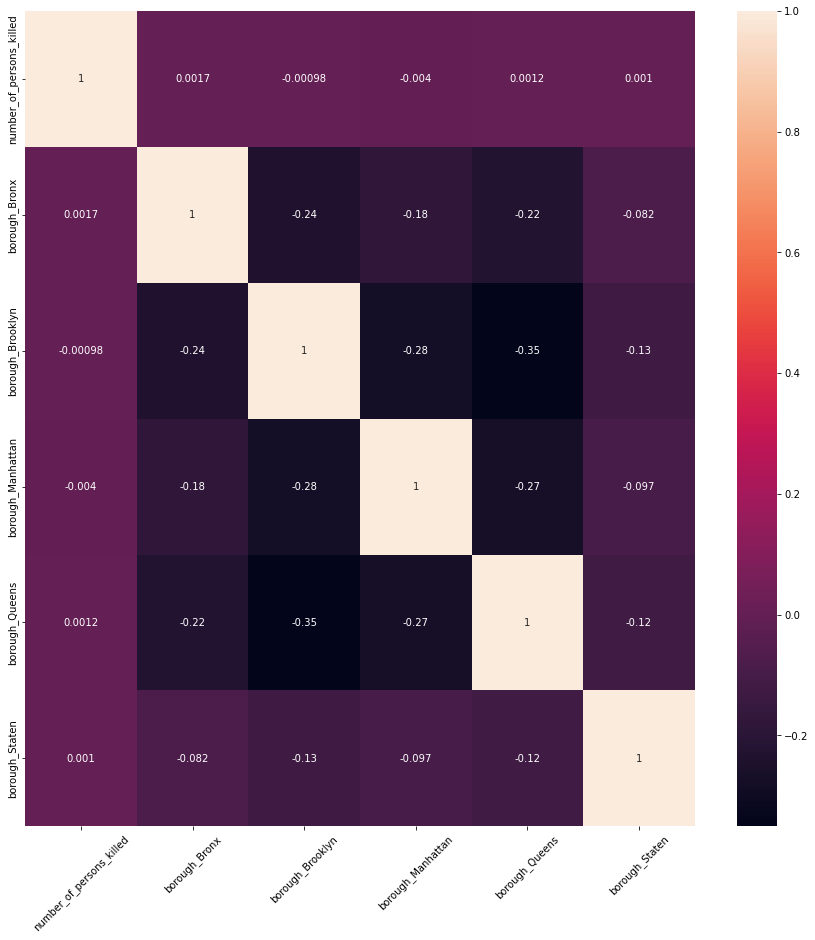

In [49]:
#build a Heatmap to examine the correlations bewteen different boroughs 
corr = heatmap_data_borough_one_hot_encoded.drop('number_of_persons_injured',axis=1).corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)

#### Question 4

In [32]:
# Is there any correlation between median income of a zip code and number of deaths from collisions?

# Group/sum number of deaths by zip code
accid_by_zip = data.groupby('zip_code').sum(numeric_only=True).reset_index()

# Merge with zip/median income data
merged_zip_income_corr = pd.merge(left=accid_by_zip, right=zip_median_income_2022, on='zip_code', how='left')

# Calculate correlation between number of pedestrians killed and median income (for zip code)
print('Correlations (Death Count and Zip Code Median Income):')

corr_deaths_income = merged_zip_income_corr[['median_income', 'number_of_persons_killed']].corr()
print('- Total deaths and median household income: ', corr_deaths_income['number_of_persons_killed']['median_income'])

corr_ped_deaths_income = merged_zip_income_corr[['median_income', 'number_of_pedestrians_killed']].corr()
print('- Pedestrian deaths and median household income: ', corr_ped_deaths_income['number_of_pedestrians_killed']['median_income'])

corr_cyc_deaths_income = merged_zip_income_corr[['median_income', 'number_of_cyclist_killed']].corr()
print('- Cyclist deaths and median household income: ', corr_cyc_deaths_income['number_of_cyclist_killed']['median_income'])

corr_motor_deaths_income = merged_zip_income_corr[['median_income', 'number_of_motorist_killed']].corr()
print('- Motorist deaths and median household income: ', corr_motor_deaths_income['number_of_motorist_killed']['median_income'])

# Correlation between income and injuries
corr_injury_income = merged_zip_income_corr[['median_income', 'number_of_persons_injured']].corr()
print('Correlations (Injury Count and Zip Code Median Income):')
print('- Total injuries and median household income: ', corr_injury_income['number_of_persons_injured']['median_income'])

corr_ped_injury_income = merged_zip_income_corr[['median_income', 'number_of_pedestrians_injured']].corr()
print('- Pedestrian injuries and median household income: ', corr_ped_injury_income['number_of_pedestrians_injured']['median_income'])

corr_cyc_injury_income = merged_zip_income_corr[['median_income', 'number_of_cyclist_injured']].corr()
print('- Cyclist injuries and median household income: ', corr_cyc_injury_income['number_of_cyclist_injured']['median_income'])

corr_motor_injury_income = merged_zip_income_corr[['median_income', 'number_of_motorist_injured']].corr()
print('- Motorist injuries and median household income: ', corr_motor_injury_income['number_of_motorist_injured']['median_income'])

# There are NaN values under median household income for some of the zip codes that have death/injury counts. However, an analysis of
# these zip codes indicate they are mostly comprised of geographically small areas in commerical parts of the city
# for which there is no residential population.
# The Python corr() method automatically ignores these records with an NaN and excludes from correlation analysis.

merged_zip_income_corr.head(10)

Correlations (Death Count and Zip Code Median Income):
- Total deaths and median household income:  -0.4004297020648095
- Pedestrian deaths and median household income:  -0.36084384777136913
- Cyclist deaths and median household income:  -0.1507498389203994
- Motorist deaths and median household income:  -0.3183442772930884
Correlations (Injury Count and Zip Code Median Income):
- Total injuries and median household income:  -0.4349920893561292
- Pedestrian injuries and median household income:  -0.39847425357390015
- Cyclist injuries and median household income:  -0.1297235384198705
- Motorist injuries and median household income:  -0.4310121825965102


,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,year,index_right,month,median_income
0,,1384.516339,-2.508401e+03,8.0,0.0,0,0,0,0,8,0,27287419,68465,1134.0,203,NaN
1,10000,16025.762551,-2.906830e+04,176.0,1.0,18,0,79,0,76,1,1663732670,841699,0.0,2943,NaN
2,10001,635293.163229,-1.153584e+06,2710.0,18.0,1005,10,525,4,1145,4,49183280868,32974890,1647842.0,107104,101409.0
3,10002,649690.284465,-1.180555e+06,4726.0,22.0,1185,17,989,3,2467,2,51929053510,32969783,1758558.0,108444,37093.0
4,10003,427732.754199,-7.769580e+05,2617.0,11.0,881,9,809,2,890,0,32073810502,21635072,1046993.0,70738,137533.0
5,10004,100662.315392,-1.830354e+05,414.0,2.0,115,1,37,0,261,1,7798590934,5182738,415619.0,17106,216017.0
6,10005,59634.607460,-1.084221e+05,254.0,0.0,104,0,66,0,81,0,4552274460,3025314,96274.0,9604,197188.0
7,10006,64035.618121,-1.164242e+05,293.0,0.0,67,0,56,0,168,0,4902945651,3329477,160961.0,11016,200536.0
8,10007,176943.243657,-3.216431e+05,920.0,2.0,311,0,191,1,410,0,13535370744,8972450,348626.0,29026,250001.0
9,10009,281421.024567,-5.111998e+05,2149.0,7.0,562,4,487,2,1063,0,21481334221,14141619,422128.0,45048,77551.0


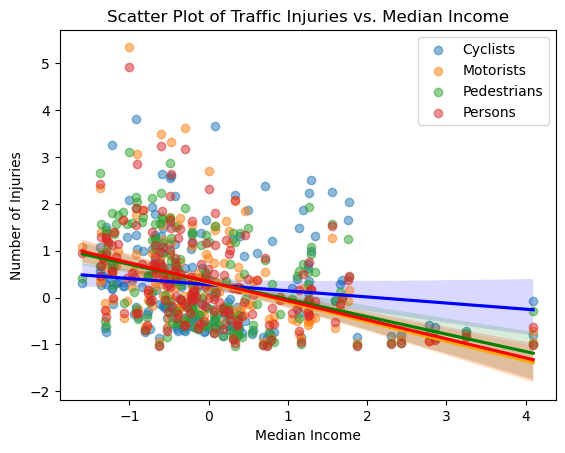

In [33]:
import numpy as np

def z_scores(data):
    # Convert data to a NumPy array for better handling of numerical operations
    data_np = np.array(data, dtype=np.float64)  # Ensures that NaN can be handled
    
    # Calculate mean and std dev excluding NaN values
    mean = np.nanmean(data_np)
    std_dev = np.nanstd(data_np)
    
    # Calculate z-scores, ignoring NaN values in calculations
    z_scores = (data_np - mean) / std_dev
    
    return z_scores

merged_zip_income_corr['number_of_cyclist_injured_z'] = z_scores(merged_zip_income_corr['number_of_cyclist_injured'])
merged_zip_income_corr['number_of_motorist_injured_z' ] = z_scores(merged_zip_income_corr['number_of_motorist_injured' ])
merged_zip_income_corr['number_of_pedestrians_injured_z'] = z_scores(merged_zip_income_corr['number_of_pedestrians_injured'])
merged_zip_income_corr['number_of_persons_injured_z'] = z_scores(merged_zip_income_corr['number_of_persons_injured'])



merged_zip_income_corr['number_of_cyclist_killed_z'] = z_scores(merged_zip_income_corr['number_of_cyclist_killed'])
merged_zip_income_corr['number_of_motorist_killed_z' ] = z_scores(merged_zip_income_corr['number_of_motorist_killed' ])
merged_zip_income_corr['number_of_pedestrians_killed_z'] = z_scores(merged_zip_income_corr['number_of_pedestrians_killed'] )
merged_zip_income_corr['number_of_persons_killed_z'] = z_scores(merged_zip_income_corr['number_of_persons_killed'])

merged_zip_income_corr['median_income_z'] = z_scores(merged_zip_income_corr['median_income'])




# Changing column names to make table cleaner
injured_income_splot = merged_zip_income_corr.rename(columns={'number_of_cyclist_injured_z' : 'Cyclists',
                    'number_of_motorist_injured_z' : 'Motorists',
                    'number_of_pedestrians_injured_z' : 'Pedestrians',
                    'number_of_persons_injured_z' : 'Persons'}) 





# List of columns to plot
columns = ['Cyclists',
           'Motorists',
           'Pedestrians',
           'Persons']

colors = ['blue', 'orange', 'green', 'red']


# Iterate over the columns, plot each scatter plot and fit a regression line
for column, color in zip(columns, colors):
    sns.regplot(x='median_income_z', y=column, data=injured_income_splot, scatter_kws={'alpha':0.5}, line_kws={"color": color}, label=column)

plt.title('Scatter Plot of Traffic Injuries vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Number of Injuries')
plt.legend()




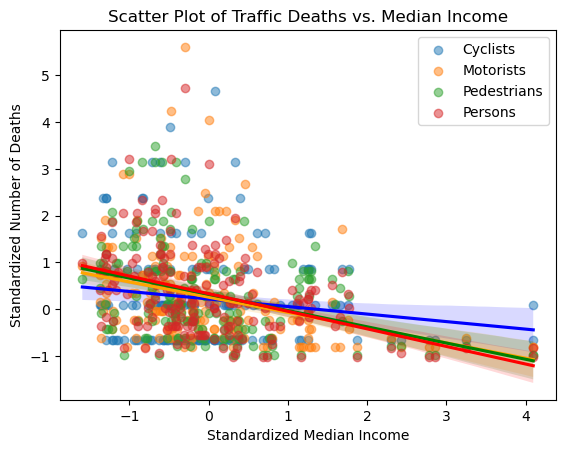

In [34]:
# Changing column names to make table cleaner
injured_income_splot = merged_zip_income_corr.rename(columns={'number_of_cyclist_killed_z' : 'Cyclists',
                    'number_of_motorist_killed_z' : 'Motorists',
                    'number_of_pedestrians_killed_z' : 'Pedestrians',
                    'number_of_persons_killed_z' : 'Persons'}) 





# List of columns to plot
columns = ['Cyclists',
           'Motorists',
           'Pedestrians',
           'Persons']

colors = ['blue', 'orange', 'green', 'red']


# Iterate over the columns, plot each scatter plot and fit a regression line
for column, color in zip(columns, colors):
    sns.regplot(x='median_income_z', y=column, data=injured_income_splot, scatter_kws={'alpha':0.5}, line_kws={"color": color}, label=column)

plt.title('Scatter Plot of Traffic Deaths vs. Median Income')
plt.xlabel('Standardized Median Income')
plt.ylabel('Standardized Number of Deaths')
plt.legend()


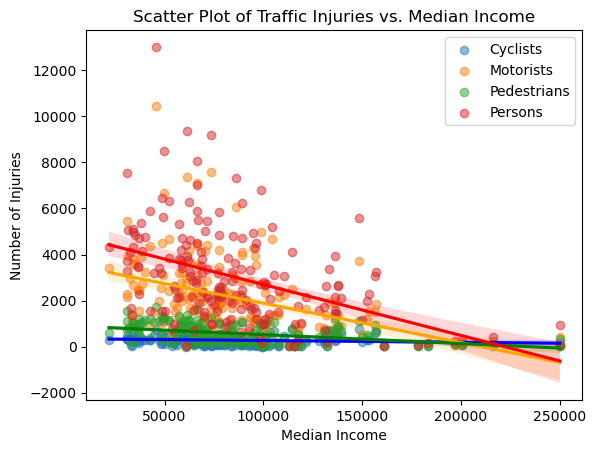

In [35]:
# correlations tables grouped by category (persons, pedestrians, motorists, cyclists) for injury and death



# Changing column names to make table cleaner
injured_income_splot = merged_zip_income_corr.rename(columns={'number_of_cyclist_injured' : 'Cyclists',
                    'number_of_motorist_injured' : 'Motorists',
                    'number_of_pedestrians_injured' : 'Pedestrians',
                    'number_of_persons_injured' : 'Persons'}) 





# List of columns to plot
columns = ['Cyclists',
           'Motorists',
           'Pedestrians',
           'Persons']

colors = ['blue', 'orange', 'green', 'red']


# Iterate over the columns, plot each scatter plot and fit a regression line
for column, color in zip(columns, colors):
    sns.regplot(x='median_income', y=column, data=injured_income_splot, scatter_kws={'alpha':0.5}, line_kws={"color": color}, label=column)

plt.title('Scatter Plot of Traffic Injuries vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Number of Injuries')
plt.legend()

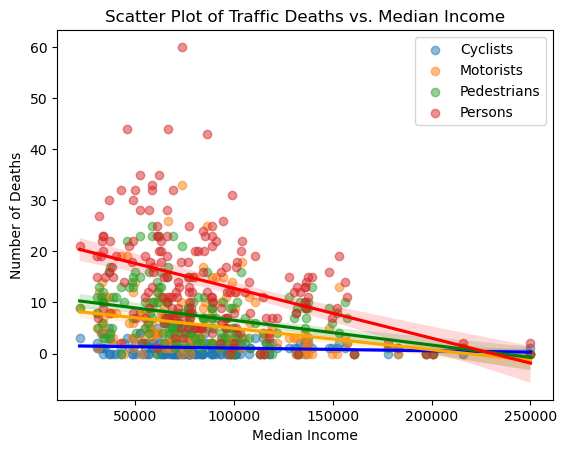

In [36]:
# correlations tables grouped by category (persons, pedestrians, motorists, cyclists) for injury and death
    # same as above but with deaths



# Changing column names to make table cleaner
injured_income_splot = merged_zip_income_corr.rename(columns={'number_of_cyclist_killed' : 'Cyclists',
                    'number_of_motorist_killed' : 'Motorists',
                    'number_of_pedestrians_killed' : 'Pedestrians',
                    'number_of_persons_killed' : 'Persons'}) 





# List of columns to plot
columns = ['Cyclists',
           'Motorists',
           'Pedestrians',
           'Persons']

colors = ['blue', 'orange', 'green', 'red']


# Iterate over the columns, plot each scatter plot and fit a regression line
for column, color in zip(columns, colors):
    sns.regplot(x='median_income', y=column, data=injured_income_splot, scatter_kws={'alpha':0.5}, line_kws={"color": color}, label=column)

plt.title('Scatter Plot of Traffic Deaths vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Number of Deaths')
plt.legend()



### Evaluating Injury Across the Zip Codes

Highest injury count in a single zip code (2013-2023):  13023.0
Zip code with highest injury count (2013-2023):  11207
Average injury count:  2272.1125
Median injury count:  1988.5


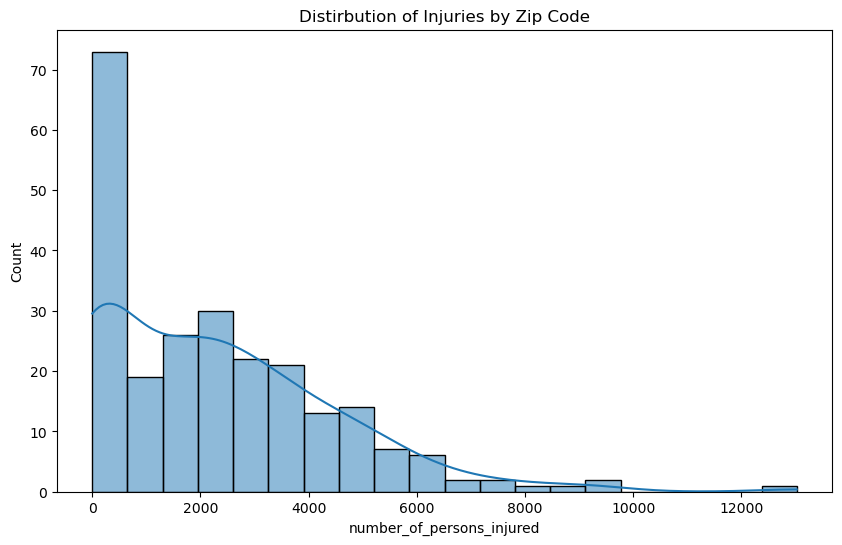

In [39]:
# The data reveals that motor vehicle accident related deaths accross the city, including pedestrian deaths, are realtively low.
# However, injury from motor vehicle accidents is much more common.
# Furthermore, an analysis of the data revealed several outlier zip codes where the injury count is 5 - 10 x higher.
# Plotting injury by zip code distribution.

#Injury by Zip Code Distribution Historgram
plt.figure(figsize=(10,6))
sns.histplot(merged_zip_income_corr['number_of_persons_injured'], kde=True, bins=20)
plt.title('Distirbution of Injuries by Zip Code')
plt.xlabel

#Locating the outlier zip code which has 10,000 injuries from 2013-2023, 10x the typical.
highest_injury_count = merged_zip_income_corr['number_of_persons_injured'].max()
print('Highest injury count in a single zip code (2013-2023): ', highest_injury_count)


zip_highest_injury_filtered = merged_zip_income_corr[(merged_zip_income_corr['number_of_persons_injured'] == 13023.0)]
if zip_highest_injury_filtered.shape[0] == 1:
    zip_highest_injury = zip_highest_injury_filtered['zip_code'].item()
    print('Zip code with highest injury count (2013-2023): ',zip_highest_injury)
elif zip_highest_injury_filtered.shape[0] > 1:
    print('Multiple zip codes with the same highest injury count:', zip_highest_injury_filtered['zip_code'].tolist())
else:
    print('No zip code match.')
# zip code 11207 in Bkly has 10,352 people injured in 12 years.

# Evaluating average and median injury statistics
avg_injury_count = merged_zip_income_corr['number_of_persons_injured'].mean()
print('Average injury count: ', avg_injury_count)
median_injury_count = merged_zip_income_corr['number_of_persons_injured'].median()
print('Median injury count: ', median_injury_count)

In [40]:
# Sort the dataset to see the zip codes with the highest injury rate at the top of the dataset
sorted_merged_df = merged_zip_income_corr.sort_values(by='number_of_persons_injured' , ascending=False)
sorted_merged_df.head(3)

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,median_income,number_of_cyclist_injured_z,number_of_motorist_injured_z,number_of_pedestrians_injured_z,number_of_persons_injured_z,number_of_cyclist_killed_z,number_of_motorist_killed_z,number_of_pedestrians_killed_z,number_of_persons_killed_z,median_income_z
146,11207,1.276800e+06,-2.319849e+06,13023.0,44.0,1730,22,710,3,10437,...,45616.0,2.092913,5.352803,3.104461,4.920962,1.619174,2.882529,2.963351,3.202889,-0.999817
142,11203,8.047744e+05,-1.463657e+06,9365.0,23.0,1364,10,524,1,7382,...,61414.0,1.318480,3.501408,2.229505,3.246600,0.098228,1.518018,0.816859,1.181785,-0.605949
174,11236,8.502872e+05,-1.546213e+06,9204.0,60.0,1229,21,358,5,7568,...,73562.0,0.627319,3.614128,1.906775,3.172906,3.140119,5.611551,2.784477,4.742778,-0.303081


## Spacial Data Visualizations

In [42]:
!pip install folium

### Accident Location Map (Pedestrian Deaths 2017 - 2023)

In [43]:
# Drop NaNs from lat/Long

data.latitude[5]#.dtype
#print(data.isnull().sum())  # Before cleaning
data_cleaned = data.dropna(subset=['latitude', 'longitude', 'borough'])
#print(data_cleaned.isnull().sum())  # After cleaning
data_cleaned.head(2)
ped_deaths_2017 = data_cleaned[(data_cleaned['year'] == 2017) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
ped_deaths_2018 = data_cleaned[(data_cleaned['year'] == 2018) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
ped_deaths_2019 = data_cleaned[(data_cleaned['year'] == 2019) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
ped_deaths_2020 = data_cleaned[(data_cleaned['year'] == 2020) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
ped_deaths_2021 = data_cleaned[(data_cleaned['year'] == 2021) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
ped_deaths_2022 = data_cleaned[(data_cleaned['year'] == 2022) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
ped_deaths_2023 = data_cleaned[(data_cleaned['year'] == 2023) & (data_cleaned['number_of_pedestrians_killed'] != 0)]
#specific_year_borough
#specific_year_borough.head(4)
data_cleaned.columns


Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'year', 'index_right', 'zip_code_mapping', 'city', 'county',
       'zip_code_geom', 'month'],
      dtype='object')

In [44]:
import folium

# Create a map centered at an average location
nyc_map = folium.Map(location=[ped_deaths_2017['latitude'].mean(), ped_deaths_2017['longitude'].mean()], zoom_start=12)

# Add crash locations to the map
for _, row in ped_deaths_2017.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5, color='red').add_to(nyc_map)
for _, row in ped_deaths_2018.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5, color='blue').add_to(nyc_map)
for _, row in ped_deaths_2019.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5, color='green').add_to(nyc_map)
for _, row in ped_deaths_2020.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=1, color='red').add_to(nyc_map)
for _, row in ped_deaths_2021.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=1, color='blue').add_to(nyc_map)
for _, row in ped_deaths_2022.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=1, color='green').add_to(nyc_map)
for _, row in ped_deaths_2023.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=1, color='black').add_to(nyc_map)
# Display the map
nyc_map

### Heat Map: Pedestrian Deaths by Zip Code

In [45]:
import json
with open('/mnt/c/Users/thefi/Documents/nyc-zip-code-tabulation-areas-polygons.geojson','r') as f:
    zip_geojson = json.load(f)

#zip_geojson
#{'type': 'FeatureCollection',
# 'features': [{'type': 'Feature',
#   'id': 0,
#   'properties': {'OBJECTID': 1,
#    'postalCode': '11372',
#    'PO_NAME': 'Jackson Heights',
#    'STATE': 'NY',
#    'borough': 'Queens',
#    'ST_FIPS': '36',
#    'CTY_FIPS': '081',
#    'BLDGpostalCode': 0,
#    'Shape_Leng': 20624.6923165,
#    'Shape_Area': 20163283.8744,
#    '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11372'},
#   'geometry': {'type': 'Polygon',
#    'coordinates': [[[-73.86942457284175, 40.74915687096787],
#      [-73.89507143240856, 40.74646547081214],
#      [-73.89618737867819, 40.74850942518086],
#      [-73.89583954185139, 40.748546875706005],
#      [-73.89525242774396, 40.74830660945023],
#      [-73.89654041085561, 40.750541998143575],
#      [-73.89579868613828, 40.750619721332605],
#      [-73.89652230661433, 40.75438879610902],
#      [-73.87221855882477, 40.756943248067465],
#      [-73.87167992356791, 40.75398717439602],
#      [-73.87207046513889, 40.75386200705204],
#      [-73.86942457284175, 40.74915687096787]]]}},

In [46]:
corr_data_cleaned = merged_zip_income_corr.dropna(subset=['latitude', 'longitude'])
corr_data_cleaned_deaths= corr_data_cleaned[(corr_data_cleaned['number_of_pedestrians_killed'] > 0)]
corr_data_cleaned_deaths.shape

corr_data_cleaned_deaths.loc[:,'zip_code'] = corr_data_cleaned_deaths['zip_code'].astype(str)

/tmp/ipykernel_752/37599092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data_cleaned_deaths.loc[:,'zip_code'] = corr_data_cleaned_deaths['zip_code'].astype(str)


In [47]:
for feature in zip_geojson['features']:
    zip_code= feature['properties']['postalCode'] # the zip code is the 'postalCode' in json
    death_count_pedestrian = corr_data_cleaned_deaths[corr_data_cleaned_deaths['zip_code'] == zip_code]['number_of_pedestrians_killed'].sum().item()
    feature['properties']['pedestrian_deaths'] = death_count_pedestrian

#zip_geojson

In [48]:
for feature in zip_geojson['features']:
    zip_code= feature['properties']['postalCode'] # the zip code is the 'postalCode' in json
    death_count_total = corr_data_cleaned_deaths[corr_data_cleaned_deaths['zip_code'] == zip_code]['number_of_persons_killed'].sum().item()
    feature['properties']['total_deaths'] = death_count_total


In [49]:
import folium

def get_color(deaths):
    if pd.isnull(deaths):
        return 'blue'
    elif deaths> 15:
        return '#600000'
    elif deaths>10:
        return '#E60000'
    elif deaths >5:
        return 'orange'
    elif deaths == 1:
        return 'yellow'
    else:
        return {
            'fillcolor':'#ffffff',
            'color':'#000000',
            'weight':1,
            'fillOpacity':0.1
        }
    
m = folium.Map(location = [40.7128, -74.0060], zoom_start=11)
folium.GeoJson(
    zip_geojson,
    name='ZIP Code Deaths',
    style_function = lambda feature: {
        'fillColor': get_color(
        corr_data_cleaned_deaths[
            corr_data_cleaned_deaths['zip_code'] == feature['properties']['postalCode']
        ]['number_of_pedestrians_killed'].sum()),
        'color':'black',
        'weight': .5,
        'fillOpacity': 0.6,
    }
).add_to(m)
m

### Heat Map: Total Deaths by Zip Code

In [51]:
# TOtal Deaths by zip code
import folium

def get_color(deaths):
    if pd.isnull(deaths):
        return 'blue'
    elif deaths> 45:
        return '#600000'
    elif deaths>20:
        return '#E60000'
    elif deaths >5:
        return 'orange'
    elif deaths >0:
        return 'yellow'
    else:
        return {
            'fillcolor':'#ffffff',
            'color':'#000000',
            'weight':1,
            'fillOpacity':0.1
        }
    
m = folium.Map(location = [40.7128, -74.0060], zoom_start=11)
folium.GeoJson(
    zip_geojson,
    name='ZIP Code Deaths',
    style_function = lambda feature: {
        'fillColor': get_color(
        corr_data_cleaned_deaths[
            corr_data_cleaned_deaths['zip_code'] == feature['properties']['postalCode']
        ]['number_of_persons_killed'].sum()),
        'color':'black',
        'weight': .5,
        'fillOpacity': 0.6,
    }
).add_to(m)
m

### Heat Map: High-Injury Zip Codes

In [58]:
#NYC zip geojson
#source: https://github.com/fedhere/PUI2015_EC/blob/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson?short_path=b1c0b57
#nyc-zip-code-tabulation-areas-polygons.geojson

In [52]:
high_injury_zip = ['11233','11434','11234','11208','11226','11212','11203','11236','11207']

In [61]:
# Look at injury/area
with open('/mnt/c/Users/thefi/Documents/nyc-zip-code-tabulation-areas-polygons.geojson', 'r') as f:
    zip_geojson = json.load(f)

# Extract relevant data from GeoJSON
area_data = []
for feature in zip_geojson['features']:
    zip_code = feature['properties']['postalCode']
    shape_area = feature['properties']['Shape_Area']
    area_data.append({'postalCode': zip_code, 'shapeArea': shape_area})

# Convert to DataFrame
area_df = pd.DataFrame(area_data)
area_df.rename(columns={'postalCode': 'zip_code'}, inplace=True)

# Group data by zip code
grouped_data_zip = data_cleaned.groupby('zip_code')[['number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed']].sum().reset_index()

# merge geojson shape area data with injury/death data
zip_area_merged_df = pd.merge(grouped_data_zip, area_df, on='zip_code', how='left')

#Sort by number of persons injured by zip
sorted_grouped_zip_injuries = grouped_data_zip.sort_values(by='number_of_persons_injured', ascending=False)
top_20_zips_injury = sorted_grouped_zip_injuries.head(20)[['zip_code', 'number_of_persons_injured']]
injury_zip_list = top_20_zips_injury.head(20)['zip_code'].tolist()

# Sort by number of persons killed by zip
sorted_grouped_zip_deaths = grouped_data_zip.sort_values(by='number_of_persons_killed', ascending=False)
top_20_zips_deaths = sorted_grouped_zip_deaths.head(20)[['zip_code', 'number_of_persons_killed']]
death_zip_list = top_20_zips_deaths.head(20)['zip_code'].tolist()

#Sort by number of persons injured/area by zip
zip_area_merged_df['injuries_per_area'] = zip_area_merged_df['number_of_persons_injured'] / zip_area_merged_df['shapeArea']
sorted_injuriesbyarea = zip_area_merged_df.sort_values(by='injuries_per_area', ascending=False)
top_20_zips_injuresbyarea = sorted_injuriesbyarea.head(20)[['zip_code', 'injuries_per_area']]
injuriesbyarea_zip_list = top_20_zips_injuresbyarea.head(20)['zip_code'].tolist()

# Sort by number of persons killed/area by zip
zip_area_merged_df['deaths_per_area'] = zip_area_merged_df['number_of_persons_killed'] / zip_area_merged_df['shapeArea']
sorted_deathsbyarea = zip_area_merged_df.sort_values(by='deaths_per_area', ascending=False)
top_20_zips_deathsbyarea = sorted_deathsbyarea.head(20)[['zip_code', 'deaths_per_area']]
deathsbyarea_zip_list = top_20_zips_deathsbyarea.head(20)['zip_code'].tolist()

In [62]:
top_20_zips_injury.set_index('zip_code', inplace=True)
top_20_zips_injuresbyarea = top_20_zips_injuresbyarea.drop_duplicates(subset=['zip_code'], keep='first')
top_20_zips_injuresbyarea.set_index('zip_code', inplace=True)
top_20_zips_deathsbyarea = top_20_zips_deathsbyarea.drop_duplicates(subset=['zip_code'], keep='first')
top_20_zips_deathsbyarea.set_index('zip_code', inplace=True)
#top_20_zips_deathsbyarea
top_20_zips_injuresbyarea

,injuries_per_area
zip_code,
10162,0.007369
11231,0.003029
10168,0.001654
10463,0.000961
10004,0.000602
11693,0.000450
10177,0.000405
10110,0.000376
10112,0.000359


In [63]:
import folium
import json

with open('/mnt/c/Users/thefi/Documents/nyc-zip-code-tabulation-areas-polygons.geojson','r') as f:
    zip_geojson = json.load(f)


def style_function(feature):
    zip_code = feature['properties']['postalCode']
    # Retrieve injury count if available, otherwise default to 0 if not found
    injury_count = top_20_zips_injury.at[zip_code, 'number_of_persons_injured'] if zip_code in top_20_zips_injury.index else 0
    #print(type(injury_count))
    # Determine fill color based on injury count
    if injury_count > 8000:
        fill_color = '#8b0000'  # Darker red
    elif injury_count > 7000:
        fill_color = '#ff0000'  # Red
    elif injury_count > 6000:
        fill_color = '#ff6347'  # Lighter red (tomato)
    elif injury_count > 5000:
        fill_color = 'purple'  
    else:
        fill_color = '#ffffff'  # White for those below 6000 or not listed
    return {
        'fillColor': fill_color,
        'color': 'black',  # Outline color
        'weight': 2,
        'fillOpacity': 0.7
    }


map_location = [40.7128, -74.0060]  

# Create a Folium map object
m = folium.Map(location=map_location, zoom_start=10)

folium.GeoJson(zip_geojson, 
               style_function = style_function,
               name='Injury by Zip Code'
              ).add_to(m)

folium.LayerControl().add_to(m)


# Display the map
m